In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# EDA
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

#models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge


# Data Preparation

In [2]:
df = pd.read_csv("../input/california-housing-prices/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Handling Categorical Variables

In [4]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
cat_cols

['ocean_proximity']

In [5]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

df.loc[:, cat_cols] = lb.fit_transform(np.array(df.loc[:, cat_cols]).reshape(-1, ))

# Handling Missing Values

<AxesSubplot:>

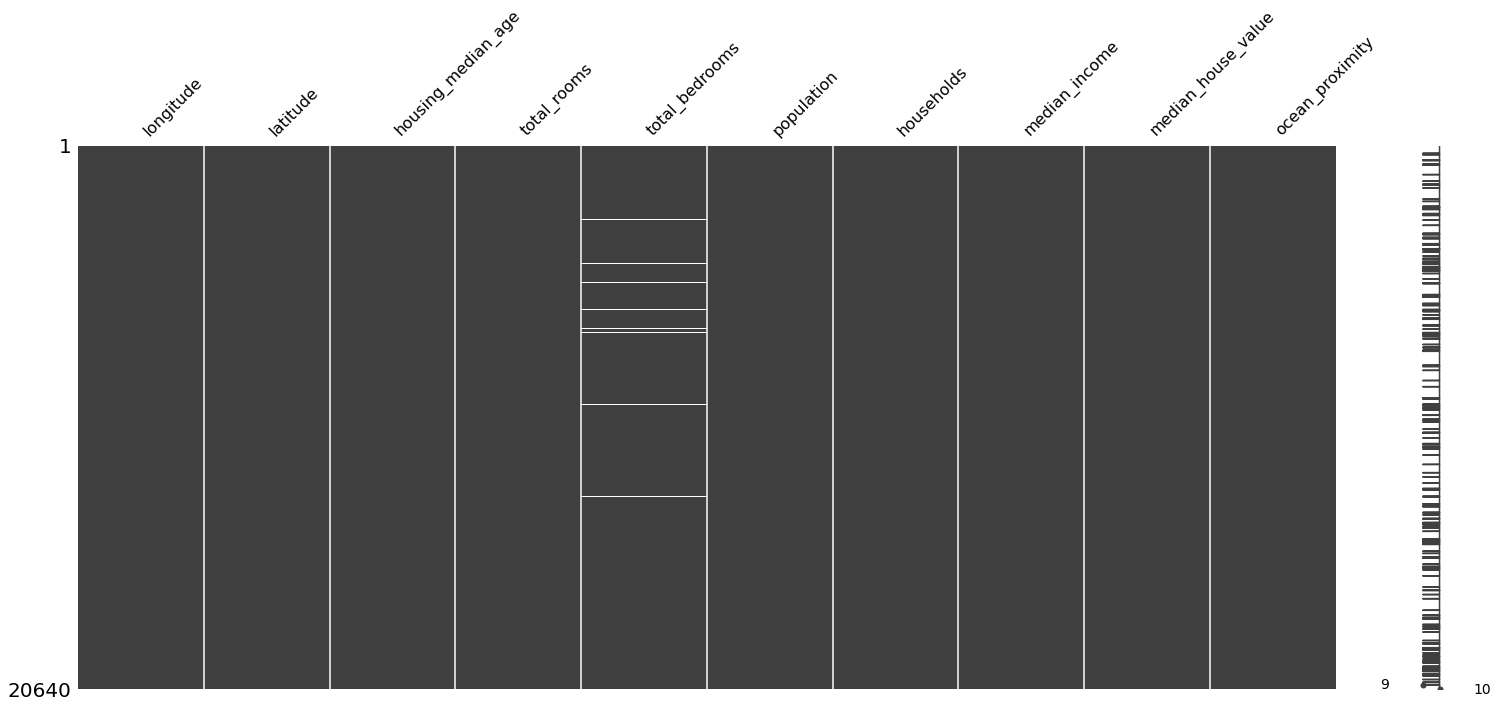

In [6]:
import missingno as msno

msno.matrix(df)

<AxesSubplot:>

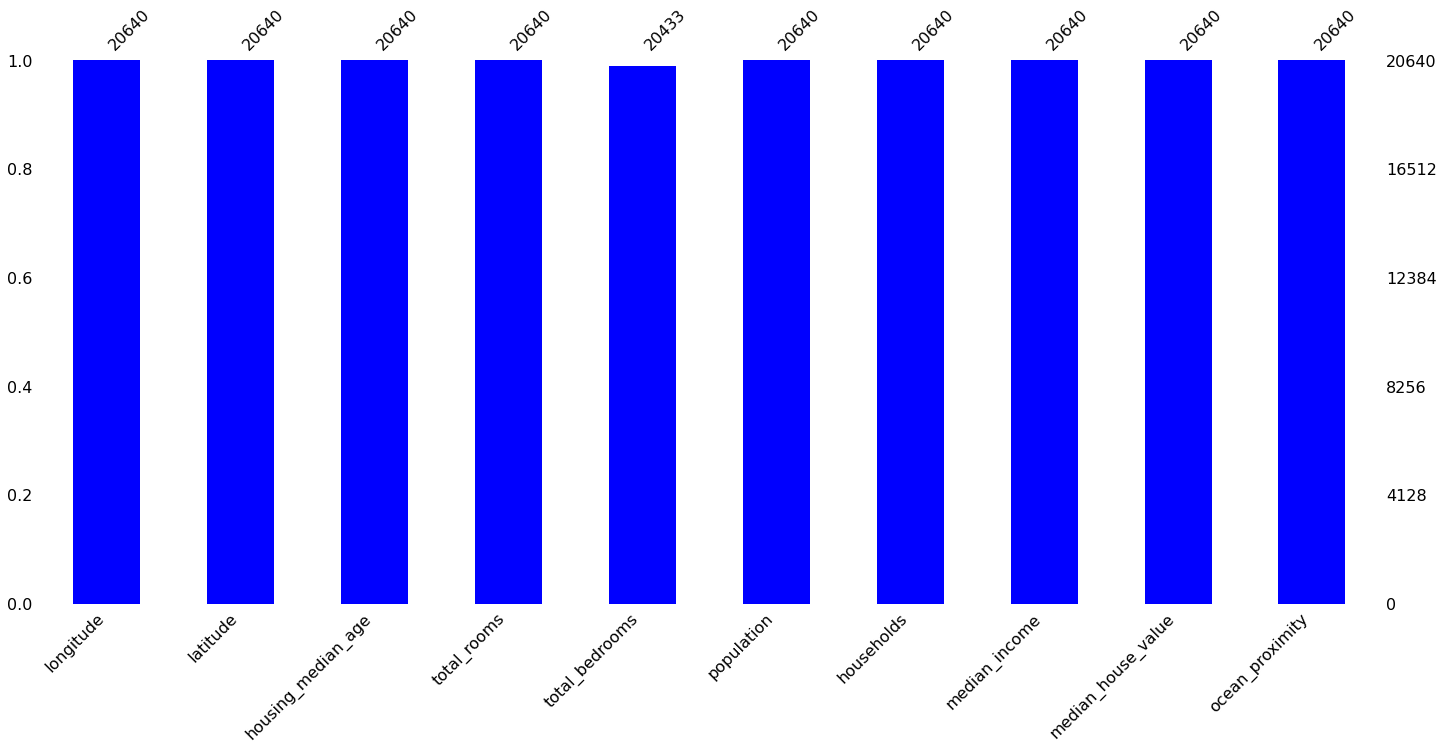

In [7]:
msno.bar(df, color = 'blue')

Above visualizations implies features total_bedrooms has missing values which we need to handle 

Will use knn imputer to impute missing values

In [8]:
from sklearn.impute import KNNImputer

knn = KNNImputer(n_neighbors = 3)

In [9]:
knn_imputer = KNNImputer(n_neighbors = 3)

df_pre1 = df.copy()

X = np.round(knn_imputer.fit_transform(df_pre1))
df_pre1 = pd.DataFrame(X, columns = df_pre1.columns)

In [10]:
df_pre1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB


In [11]:
X = np.array(df_pre1.drop('median_house_value', axis = 1))
y = np.array(df_pre1['median_house_value'])

# Feature Scaling 

In [12]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

X = pt.fit_transform(X)

# Train test split

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Linear Regression 


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics


lr = LinearRegression()

lr.fit(X_train, y_train)

print("Mean Squared Error For Linear Regression Model is : {}".format(metrics.mean_squared_error(y_test, lr.predict(X_test))))
print("Root Mean Square Error For Linear Regression Model is : {}".format(np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test)))))
print("Mean Absolute Erorr For Linear Regression Model is : {}".format(metrics.mean_absolute_error(y_test, lr.predict(X_test))))

Mean Squared Error For Linear Regression Model is : 5531838360.363265
Root Mean Square Error For Linear Regression Model is : 74376.32930148722
Mean Absolute Erorr For Linear Regression Model is : 56173.66295844526


# Support Vector Machine

In [15]:
from sklearn.svm import SVR
from sklearn import metrics


svr = SVR()

svr.fit(X_train, y_train)

print("Mean Squared Error For Support Vector Machine Model is : {}".format(metrics.mean_squared_error(y_test, svr.predict(X_test))))
print("Root Mean Square Error For Support Vector Machine Model is : {}".format(np.sqrt(metrics.mean_squared_error(y_test, svr.predict(X_test)))))
print("Mean Absolute Erorr For Support Vector Machine Model is : {}".format(metrics.mean_absolute_error(y_test, svr.predict(X_test))))

Mean Squared Error For Support Vector Machine Model is : 13986298721.176523
Root Mean Square Error For Support Vector Machine Model is : 118263.68301882248
Mean Absolute Erorr For Support Vector Machine Model is : 88329.72068266578


# Decision Tree Regressor

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics


dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)

print("Mean Squared Error For Decision Tree Model is : {}".format(metrics.mean_squared_error(y_test, dt.predict(X_test))))
print("Root Mean Square Error For Decision Tree Model is : {}".format(np.sqrt(metrics.mean_squared_error(y_test, dt.predict(X_test)))))
print("Mean Absolute Erorr For Decision Tree Model is : {}".format(metrics.mean_absolute_error(y_test, dt.predict(X_test))))

Mean Squared Error For Decision Tree Model is : 7184694907.542797
Root Mean Square Error For Decision Tree Model is : 84762.57964186081
Mean Absolute Erorr For Decision Tree Model is : 57077.697835917315


# Bayesian Regression

In [17]:
from sklearn.linear_model import BayesianRidge
from sklearn import metrics


bs = BayesianRidge()

bs.fit(X_train, y_train)

print("Mean Squared Error For Bayesian Regression Model is : {}".format(metrics.mean_squared_error(y_test, bs.predict(X_test))))
print("Root Mean Square Error For Bayesian Regression Model is : {}".format(np.sqrt(metrics.mean_squared_error(y_test, bs.predict(X_test)))))
print("Mean Absolute Erorr For Bayesian Regression Model is : {}".format(metrics.mean_absolute_error(y_test, bs.predict(X_test))))

Mean Squared Error For Bayesian Regression Model is : 6172501897.225618
Root Mean Square Error For Bayesian Regression Model is : 78565.27157227689
Mean Absolute Erorr For Bayesian Regression Model is : 59686.95425546353


# Random Forest Regressor

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


rf = RandomForestRegressor()

rf.fit(X_train, y_train)

print("Mean Squared Error For Random Forest Model is : {}".format(metrics.mean_squared_error(y_test, rf.predict(X_test))))
print("Root Mean Square Error For Random Forest Model is : {}".format(np.sqrt(metrics.mean_squared_error(y_test, rf.predict(X_test)))))
print("Mean Absolute Erorr For Random Forest Model is : {}".format(metrics.mean_absolute_error(y_test, rf.predict(X_test))))

Mean Squared Error For Random Forest Model is : 3838864137.9196997
Root Mean Square Error For Random Forest Model is : 61958.567913725215
Mean Absolute Erorr For Random Forest Model is : 42536.72995155039
